<a href="https://colab.research.google.com/github/JCK07115/IntroML/blob/main/assig1/analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

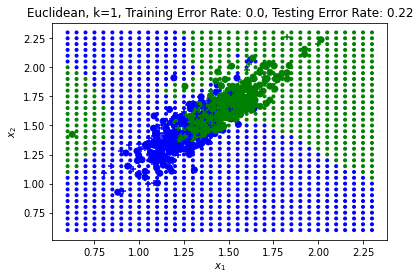

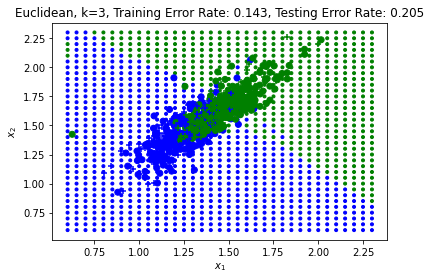

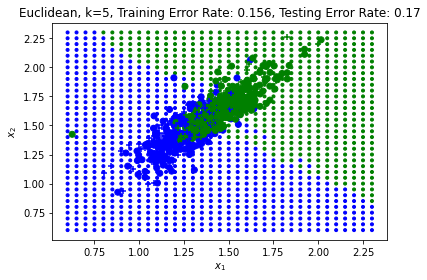

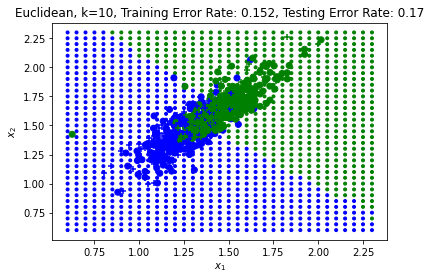

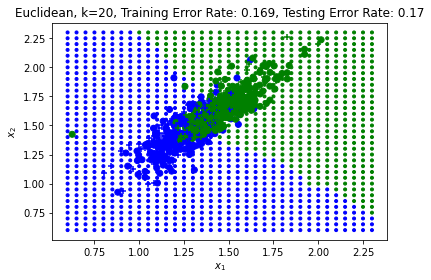

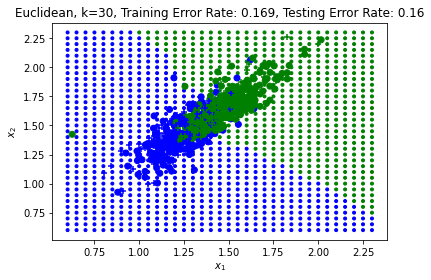

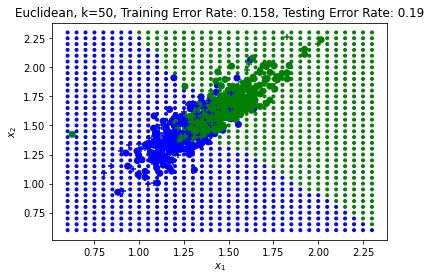

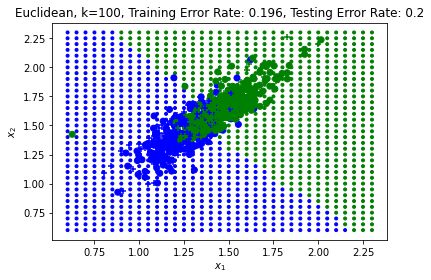

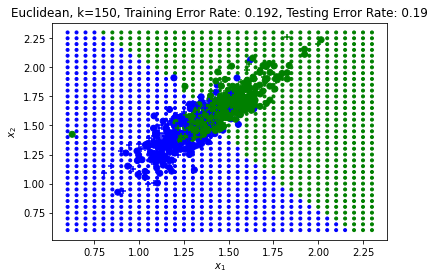

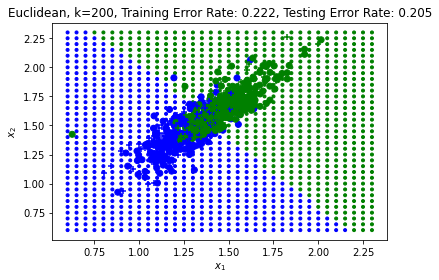

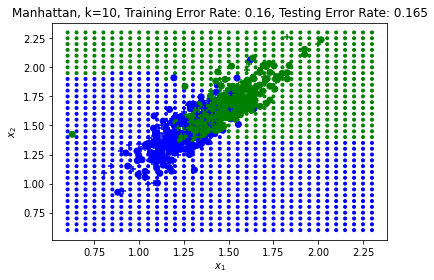

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

train_DAT = pd.read_csv(filepath_or_buffer='./data/train.sDAT.csv', header=None)
train_DAT.rename(columns={0:"x1", 1:"x2"}, inplace=True)
train_NC = pd.read_csv(filepath_or_buffer='./data/train.sNC.csv', header=None)
train_NC.rename(columns={0:"x1", 1:"x2"}, inplace=True)
test_DAT = pd.read_csv(filepath_or_buffer='./data/test.sDAT.csv', header=None)
test_DAT.rename(columns={0:"x1", 1:"x2"}, inplace=True)
test_NC = pd.read_csv(filepath_or_buffer='./data/test.sNC.csv', header=None)
test_NC.rename(columns={0:"x1", 1:"x2"}, inplace=True)
train_DAT['label'] = 1
train_NC['label'] = 0
test_DAT['label'] = 1
test_NC['label'] = 0
train_df = pd.concat([train_DAT, train_NC], axis=0)
test_df = pd.concat([test_DAT, test_NC], axis=0)

k = [1, 3, 5, 10, 20, 30, 50, 100, 150, 200]
colors = {0: 'green', 1: "blue"}

def generatePlot(k, metric):
  if metric == "Euclidean":
    neigh = KNeighborsClassifier(n_neighbors=k)
    neigh.fit(train_df[['x1', 'x2']], train_df['label'])
    train_err = round(1 - neigh.score(train_df[['x1', 'x2']], train_df['label']), 3)
    test_err = round(1 - neigh.score(test_df[['x1', 'x2']], test_df['label']), 3)
    grid_points = pd.read_csv(filepath_or_buffer='./data/2D_grid_points.csv', header=None)
    grid_points.rename(columns={0:"x1", 1:"x2"}, inplace=True)
    grid_points['predict'] = neigh.predict(grid_points)

    fig, ax = plt.subplots()
    ax.scatter(grid_points['x1'], grid_points['x2'], c=grid_points['predict'].map(colors), marker='.')
    ax.scatter(train_df['x1'], train_df['x2'], c=train_df['label'].map(colors), marker='o')
    ax.scatter(test_df['x1'], test_df['x2'], c=test_df['label'].map(colors), marker='+')
    ax.set_xlabel("$x_1$")
    ax.set_ylabel("$x_2$")
    ax.set_title("Euclidean, k=" + str(k) + ", Training Error Rate: " + str(train_err) + ", Testing Error Rate: " + str(test_err))

  elif metric == "Manhattan":
    neigh = KNeighborsClassifier(n_neighbors=k, p=1)
    neigh.fit(train_df[['x1', 'x2']], train_df['label'])
    train_err = round(1 - neigh.score(train_df[['x1', 'x2']], train_df['label']), 3)
    test_err = round(1 - neigh.score(test_df[['x1', 'x2']], test_df['label']), 3)
    grid_points = pd.read_csv(filepath_or_buffer='./data/2D_grid_points.csv', header=None)
    grid_points.rename(columns={0:"x1", 1:"x2"}, inplace=True)
    grid_points['predict'] = neigh.predict(grid_points)

    fig, ax = plt.subplots()
    ax.scatter(grid_points['x1'], grid_points['x2'], c=grid_points['predict'].map(colors), marker='.')
    ax.scatter(train_df['x1'], train_df['x2'], c=train_df['label'].map(colors), marker='o')
    ax.scatter(test_df['x1'], test_df['x2'], c=test_df['label'].map(colors), marker='+')
    ax.set_xlabel("$x_1$")
    ax.set_ylabel("$x_2$")
    ax.set_title("Manhattan, k=" + str(k) + ", Training Error Rate: " + str(train_err) + ", Testing Error Rate: " + str(test_err))


for i in k:
  generatePlot(i, "Euclidean")

generatePlot(10, "Manhattan")


TypeError: ignored

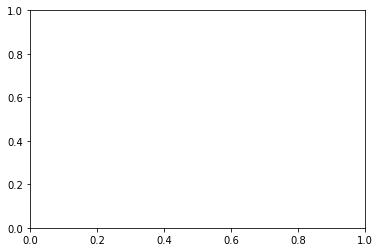

In [ ]:


# ax.plot(x=grid_points[0],y=grid_points[1], c=)
plt.show()